## Tugas

Buatlah sebuah model KMeans dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model KMeans dengan mempertimbangkan jumlah $k$ yang terbaik.

In [1]:
# Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Seleksi Fitur

X = df.iloc[:, 2:-1]
y = df.iloc[:, -1]

X.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


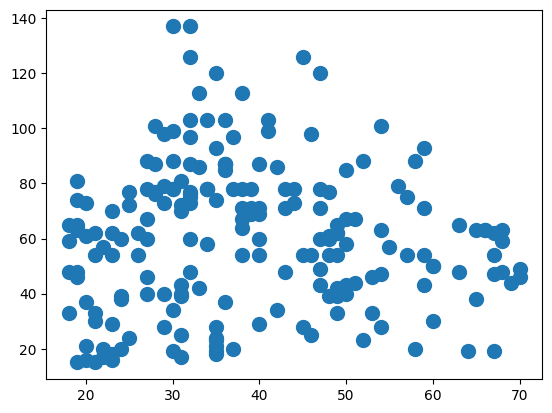

In [3]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [4]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

[[35.52173913 83.16304348]
 [41.68518519 41.30555556]]


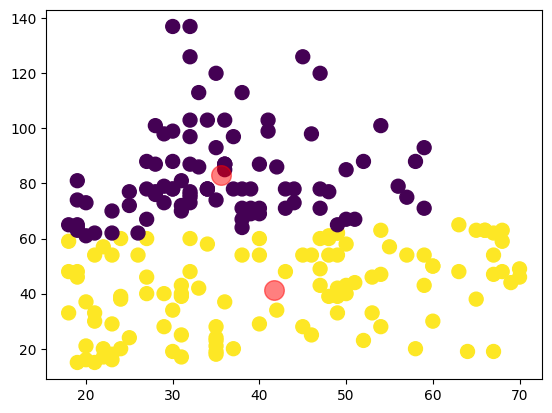

In [5]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
print(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [6]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 87179.72383252817


Dari hasil ploting dan SSE mungkin kita masih tidak yakin apakah $k=2$ sudah merupakan nilai yang terbaik. Maka, jika akan mencoba menggunakan motode elbow untuk menjadi nilai $k$ yang terbaik.

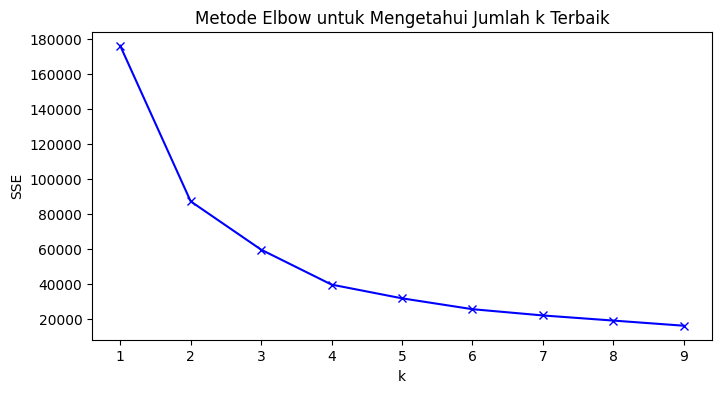

In [7]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Dari plot nilai SSE dengan metode elbow, diketahui bahwa, nilai $k=3$ merupakan jumlah cluster terbaik

In [8]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=176108.77999999997
k=2; SSE=87121.56591478697
k=3; SSE=59486.96143928035
k=4; SSE=39502.77850064537
k=5; SSE=31659.353138717815
k=6; SSE=25443.166917679824
k=7; SSE=21865.689859049562
k=8; SSE=18935.70264957265
k=9; SSE=15993.23555665689
